## 1.加载MNIST数据集

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers,datasets
(x,y),(x_val,y_val)=datasets.mnist.load_data()

# 转换为tensor格式并分批
x=tf.convert_to_tensor(x,dtype=tf.float32)/255.
y=tf.convert_to_tensor(y,dtype=tf.int32)
y=tf.one_hot(y,depth=10)
print(x.shape)
print(y.shape)
train_dataset=tf.data.Dataset.from_tensor_slices((x,y))
train_dataset=train_dataset.batch(200)

(60000, 28, 28)
(60000, 10)


## 2.模型构建

In [2]:
# 3个非线性层嵌套模型
model=keras.Sequential([
    layers.Dense(512,activation='relu'), # 隐藏层1
    layers.Dense(256,activation='relu'), # 隐藏层2
    layers.Dense(10), #输出层,10个分类
])
# 优化器SGD
optimizer=optimizers.SGD(learning_rate=0.001)

## 3.模型训练

In [3]:
all_loss=[]
def train_with_single_epoch(epoch_no):
    for step,(x,y) in enumerate(train_dataset):
        with tf.GradientTape() as tape: # 构建梯度记录环境
            # 前向
            x=tf.reshape(x,(-1,28*28)) # 拉平，[b,28,28]=>[b,784]
            out=model(x) # 得到模型输出
            # 计算每个样本的平均误差
            loss=tf.square(out-y)
            loss=tf.reduce_sum(loss)/x.shape[0]
            global all_loss
            all_loss.append(loss)
        # 计算参数的梯度
        grads=tape.gradient(loss,model.trainable_variables)
        # 更新网络参数, w'=w-lr*grad
        optimizer.apply_gradients(zip(grads,model.trainable_variables))

        if step%100==0:
            print(f'epoch[{epoch_no}]-step[{step}] loss:{loss.numpy()}')


def run():
    for epoch in range(30):
        train_with_single_epoch(epoch_no=epoch)

run()

epoch[0]-step[0] loss:1.801163673400879
epoch[0]-step[100] loss:0.9222341179847717
epoch[0]-step[200] loss:0.7424997091293335
epoch[1]-step[0] loss:0.6835026741027832
epoch[1]-step[100] loss:0.6778228282928467
epoch[1]-step[200] loss:0.5668632984161377
epoch[2]-step[0] loss:0.5605961084365845
epoch[2]-step[100] loss:0.5918837189674377
epoch[2]-step[200] loss:0.49526241421699524
epoch[3]-step[0] loss:0.5008974671363831
epoch[3]-step[100] loss:0.5428507924079895
epoch[3]-step[200] loss:0.4538201093673706
epoch[4]-step[0] loss:0.4631483554840088
epoch[4]-step[100] loss:0.5077462196350098
epoch[4]-step[200] loss:0.4250261187553406
epoch[5]-step[0] loss:0.4353351294994354
epoch[5]-step[100] loss:0.48068228363990784
epoch[5]-step[200] loss:0.4030313193798065
epoch[6]-step[0] loss:0.4134552776813507
epoch[6]-step[100] loss:0.4586365818977356
epoch[6]-step[200] loss:0.38520127534866333
epoch[7]-step[0] loss:0.3952696919441223
epoch[7]-step[100] loss:0.44043540954589844
epoch[7]-step[200] loss:

## 4.模型验证

In [4]:
# 转换为tensor格式并分批
val_loss=[]
x_val=tf.convert_to_tensor(x_val,dtype=tf.float32)/255.
y_val=tf.convert_to_tensor(y_val,dtype=tf.int32)
y_val=tf.one_hot(y_val,depth=10)
print(x_val.shape)
print(y_val.shape)
val_dataset=tf.data.Dataset.from_tensor_slices((x_val,y_val))
# val_dataset=train_dataset.batch(200)
for (x,y) in val_dataset:
    x=tf.reshape(x,(-1,28*28))
    out=model(x)
    loss=tf.square(out-y)
    loss=tf.reduce_sum(loss)/x.shape[0]
    global val_loss
    val_loss.append(loss)

(10000, 28, 28)
(10000, 10)


## 5.画误差曲线

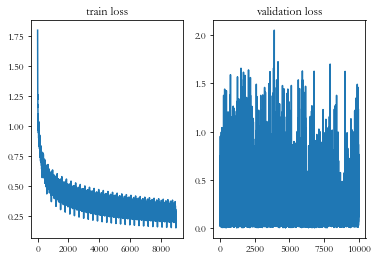

In [5]:
import matplotlib.pyplot as plt
x1=range(0,len(all_loss))
x2=range(0,len(val_loss))
plt.subplot(1,2,1)
plt.plot(x1,all_loss)
plt.title('train loss')
plt.subplot(1,2,2)
plt.plot(x2,val_loss)
plt.title('validation loss')
plt.show()

In [ ]:
pid=os.getpid()
!kill -9 $pid